In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
df= pd.read_csv('ionosphere_data.csv')

In [9]:
df

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,True,False,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,True,False,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,True,False,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,True,False,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,True,False,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,True,False,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,True,False,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,True,False,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,True,False,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [12]:
X = df.drop("column_ai", axis=1)

In [13]:
le = LabelEncoder()
y = le.fit_transform(df["column_ai"])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=500,
    learning_rate=0.5,
    random_state=42
)

In [20]:
model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=500, random_state=42)

In [21]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1])

In [22]:
def explain_model(model,  X_train, X_test, y_train, y_test, features = None):
    print('Test Results:')
    y_pred = model.predict(X_test)
    print(classification_report(y_pred, y_test))
    print(confusion_matrix(y_pred, y_test))
    print('Train Results:')
    y_pred_tr = model.predict(X_train)
    print(classification_report(y_pred_tr, y_train))
    print(confusion_matrix(y_pred_tr, y_train))
    print('------------------')
    print('------------------')
    plt.figure(figsize=(20, 10))
    plot_tree(model, 
              filled=True,
              feature_names = features,
              class_names=True,
              rounded=True,
              fontsize=10)
    plt.title("Visualization", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

In [23]:
explain_model(model,  X_train, X_test, y_train, y_test)

Test Results:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.96      0.98        48

    accuracy                           0.97        71
   macro avg       0.96      0.98      0.97        71
weighted avg       0.97      0.97      0.97        71

[[23  0]
 [ 2 46]]
Train Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       179

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280

[[101   0]
 [  0 179]]
------------------
------------------


InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=500, random_state=42) instead.

<Figure size 2000x1000 with 0 Axes>

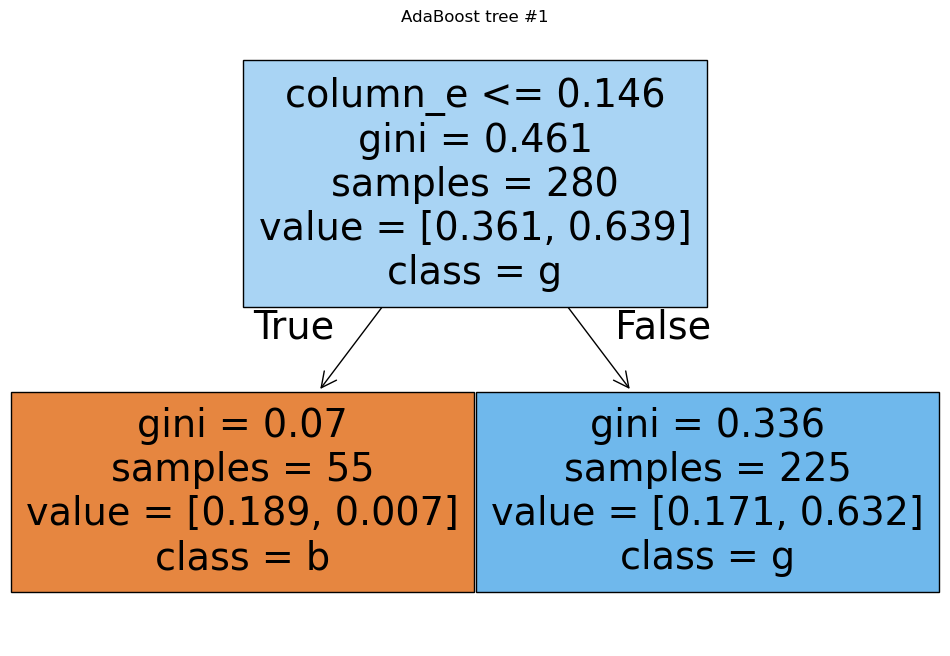

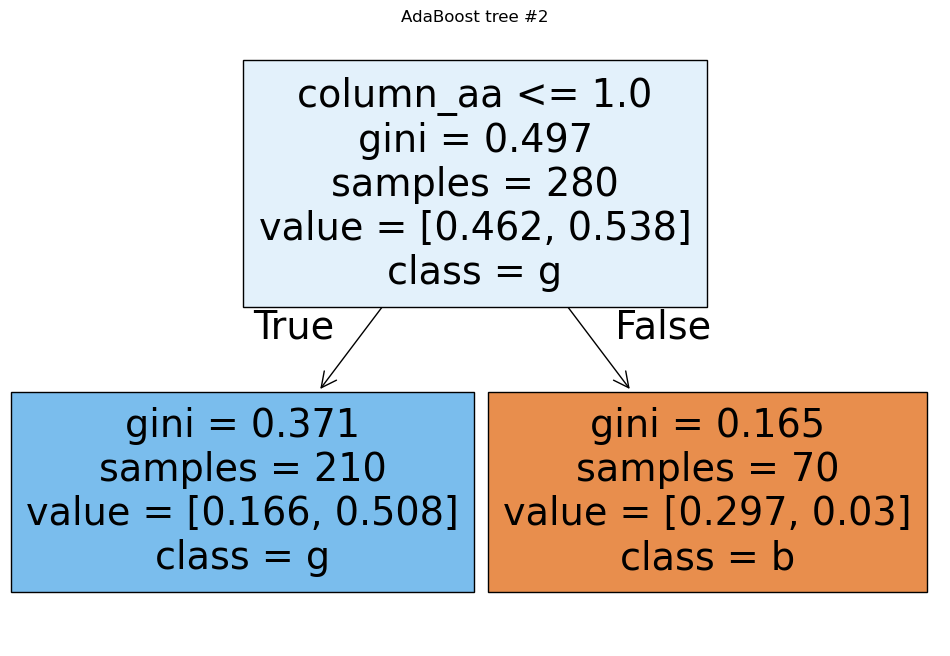

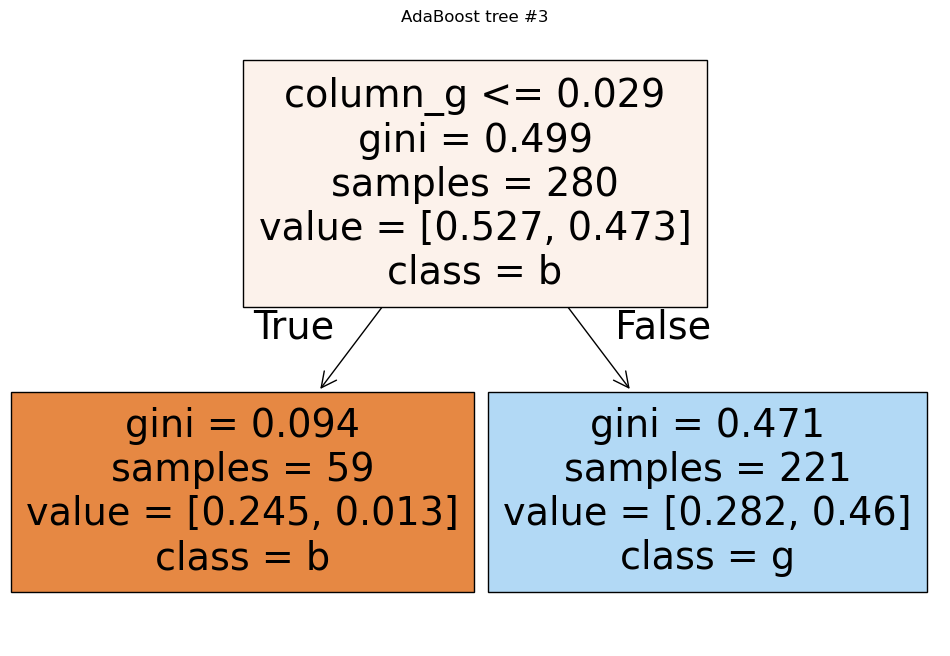

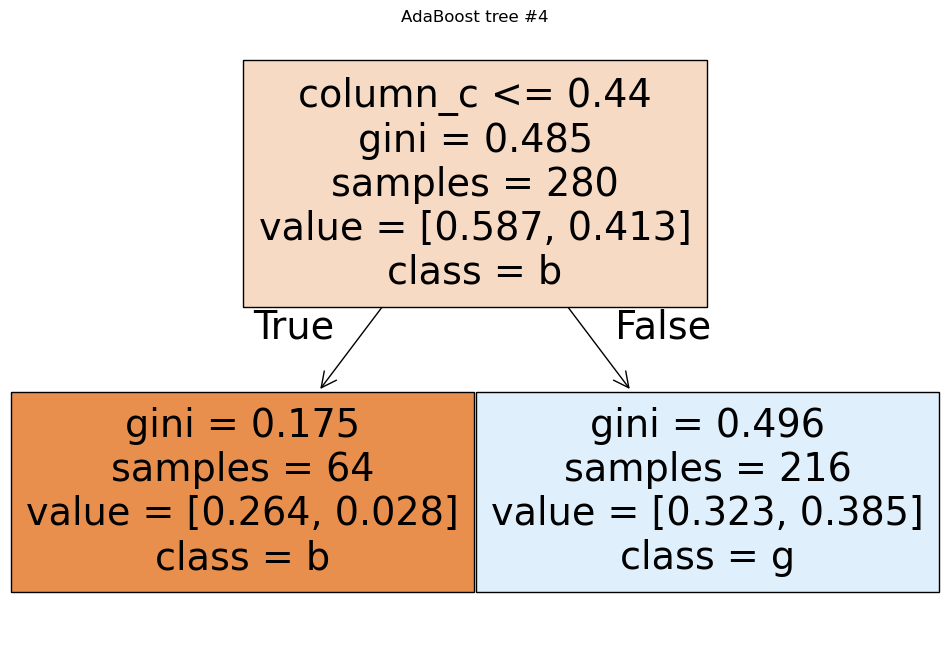

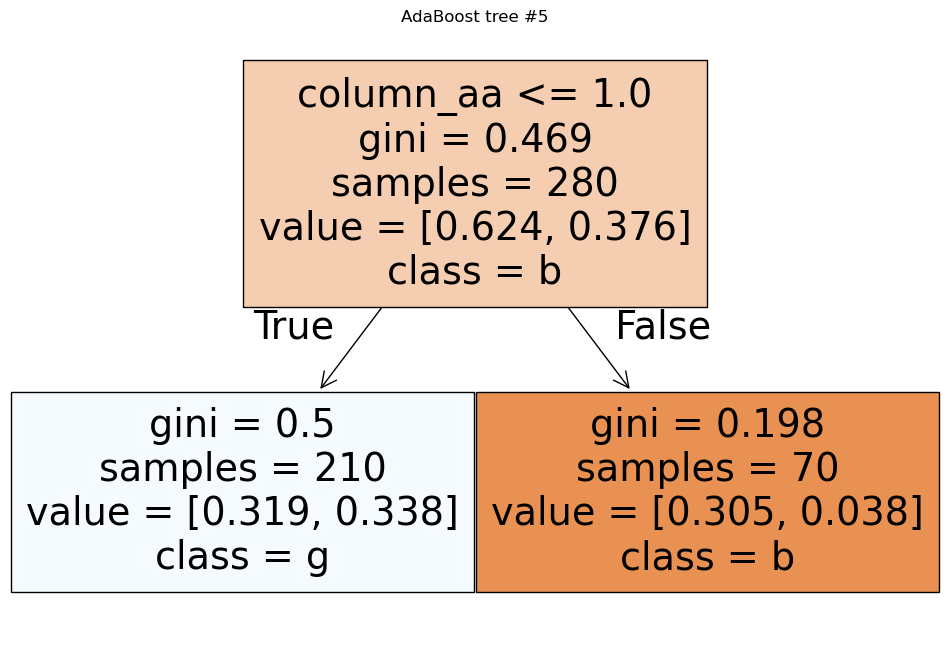

In [24]:
for i, tree in enumerate(model.estimators_[:5]):
    plt.figure(figsize=(12, 8))
    plot_tree(tree, filled=True, feature_names=X.columns, class_names=le.classes_)
    plt.title(f"AdaBoost tree #{i+1}")
    plt.show()